# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

### Perkenalan Dataset Air Quality New York City

#### 1.1 Sumber Dataset
Dataset diperoleh dari data.gov, platform data terbuka pemerintah Amerika Serikat. Berjudul "Air Quality", terakhir diperbarui pada 19 April 2024.

#### 1.2 Dimensi dan Karakteristik Dataset
- **Dimensi:** 16,889 baris dan 11 kolom
- **Tipe Data:**
  - **Numerik:** Unique ID, Indicator ID, Measure, Time Period, Data Value
  - **Kategorikal:** Geo Type Name, Geo Place Name

#### 1.3 Deskripsi Dataset
Dataset berisi informasi surveilans kualitas udara di New York City, mencakup:
- Pengukuran polutan udara
- Informasi geografis lokasi pengukuran
- Periode waktu pengukuran

**Signifikansi:** Memberikan perspektif komprehensif tentang kualitas udara dan potensi dampaknya terhadap kesehatan masyarakat.

#### 1.4 Kriteria untuk Clustering
- Tidak memiliki label bawaan
- Cocok untuk proses unsupervised learning
- Memiliki variasi data yang memungkinkan analisis bermakna

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [4]:
# Memuat dataset
url = 'https://raw.githubusercontent.com/Fadelhamkaa/Belajar-Machine-Learning-untuk-Pemula/main/Dataset_clustering.csv'
# Pastikan path file sudah sesuai
df = pd.read_csv(url)

In [5]:
#Tampilkan isi dataset
df

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,01/01/2015,0.3,NaN
1,221956,386,Ozone (O3),Mean,ppb,UHF34,305307.0,Upper East Side-Gramercy,Summer 2014,06/01/2014,24.9,NaN
2,221806,386,Ozone (O3),Mean,ppb,UHF34,103.0,Fordham - Bronx Pk,Summer 2014,06/01/2014,30.7,NaN
3,221836,386,Ozone (O3),Mean,ppb,UHF34,204.0,East New York,Summer 2014,06/01/2014,32.0,NaN
4,221812,386,Ozone (O3),Mean,ppb,UHF34,104.0,Pelham - Throgs Neck,Summer 2014,06/01/2014,31.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
18020,816914,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2019,01/01/2019,12.9,NaN
18021,816913,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2010,01/01/2010,14.7,NaN
18022,816872,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,208.0,Canarsie - Flatlands,2010,01/01/2010,43.4,NaN
18023,816832,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,407.0,Southwest Queens,2010,01/01/2010,65.8,NaN


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### **1. Memahami Struktur Data**

In [6]:
# Menampilkan jumlah baris dan kolom
print("Shape of dataset:", df.shape)

Shape of dataset: (18025, 12)


In [7]:
# Menampilkan informasi tipe data dan non-null count
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18025 entries, 0 to 18024
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       18025 non-null  int64  
 1   Indicator ID    18025 non-null  int64  
 2   Name            18025 non-null  object 
 3   Measure         18025 non-null  object 
 4   Measure Info    18025 non-null  object 
 5   Geo Type Name   18025 non-null  object 
 6   Geo Join ID     18016 non-null  float64
 7   Geo Place Name  18016 non-null  object 
 8   Time Period     18025 non-null  object 
 9   Start_Date      18025 non-null  object 
 10  Data Value      18025 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.7+ MB
None


In [8]:
# Konversi kolom tanggal ke datetime
df["Start_Date"] = pd.to_datetime(df["Start_Date"])

# Menampilkan informasi dataset setelah konversi tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18025 entries, 0 to 18024
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unique ID       18025 non-null  int64         
 1   Indicator ID    18025 non-null  int64         
 2   Name            18025 non-null  object        
 3   Measure         18025 non-null  object        
 4   Measure Info    18025 non-null  object        
 5   Geo Type Name   18025 non-null  object        
 6   Geo Join ID     18016 non-null  float64       
 7   Geo Place Name  18016 non-null  object        
 8   Time Period     18025 non-null  object        
 9   Start_Date      18025 non-null  datetime64[ns]
 10  Data Value      18025 non-null  float64       
 11  Message         0 non-null      float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 1.7+ MB


### **2. Menangani Data yang Hilang**

In [9]:
# Mengidentifikasi missing values di tiap kolom
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           9
Geo Place Name        9
Time Period           0
Start_Date            0
Data Value            0
Message           18025
dtype: int64


### **3. Analisis Distribusi dan Korelasi**

In [10]:
# Statistik Deskriptif untuk Variabel Numerik
print("\nRingkasan Statistik untuk Fitur Numerik:")
print(df.describe(include=['number']))


Ringkasan Statistik untuk Fitur Numerik:
           Unique ID  Indicator ID   Geo Join ID    Data Value  Message
count   18025.000000  18025.000000  1.801600e+04  18025.000000      0.0
mean   426387.692705    434.830180  5.906303e+05     21.428616      NaN
std    250489.450630    115.852371  7.769549e+06     23.999345      NaN
min    121644.000000    365.000000  1.000000e+00      0.000000      NaN
25%    175303.000000    365.000000  2.020000e+02      8.900000      NaN
50%    410803.000000    375.000000  3.030000e+02     15.200000      NaN
75%    649893.000000    386.000000  4.040000e+02     26.700000      NaN
max    828353.000000    661.000000  1.051061e+08    424.700000      NaN


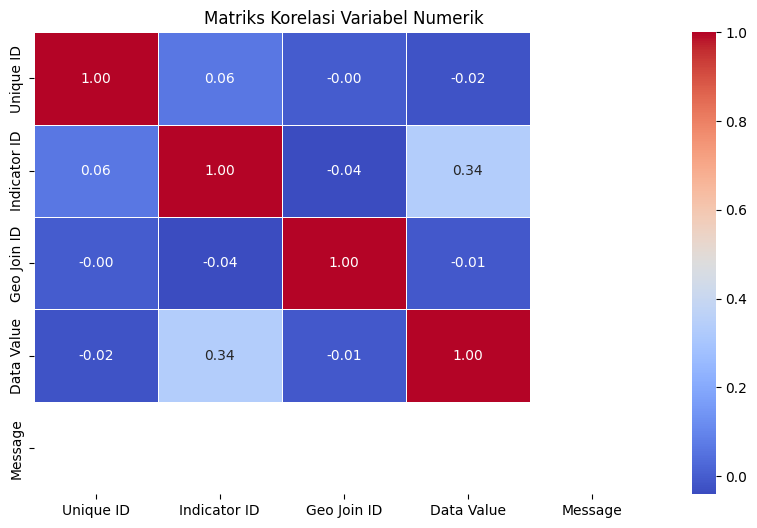

In [11]:
# Matriks Korelasi untuk Variabel Numerik
numerical_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_columns].corr()

# Visualisasi Matriks Korelasi menggunakan Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Variabel Numerik")
plt.show()

### **4. Visualisasi Data**

<Figure size 1200x800 with 0 Axes>

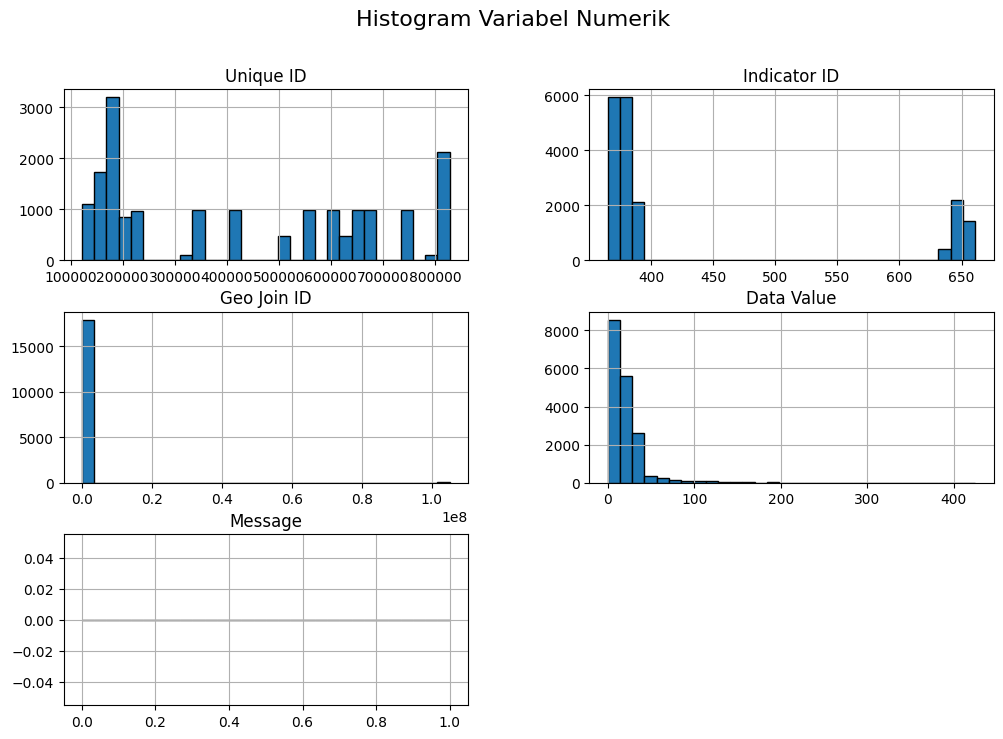

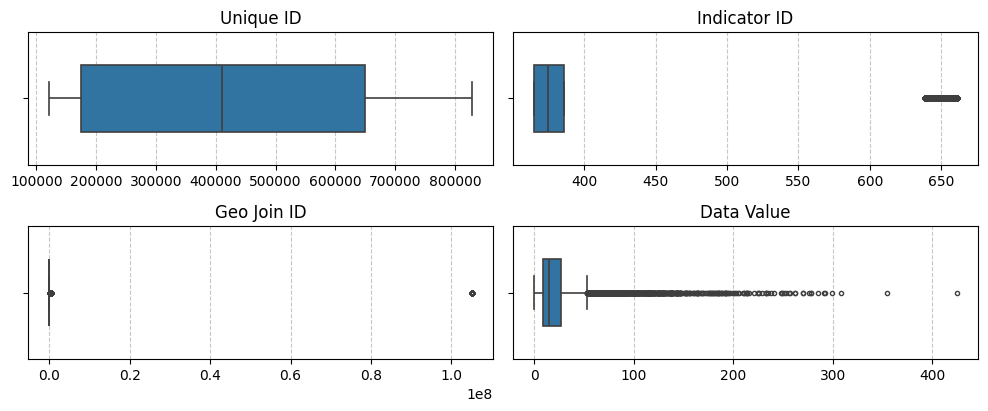

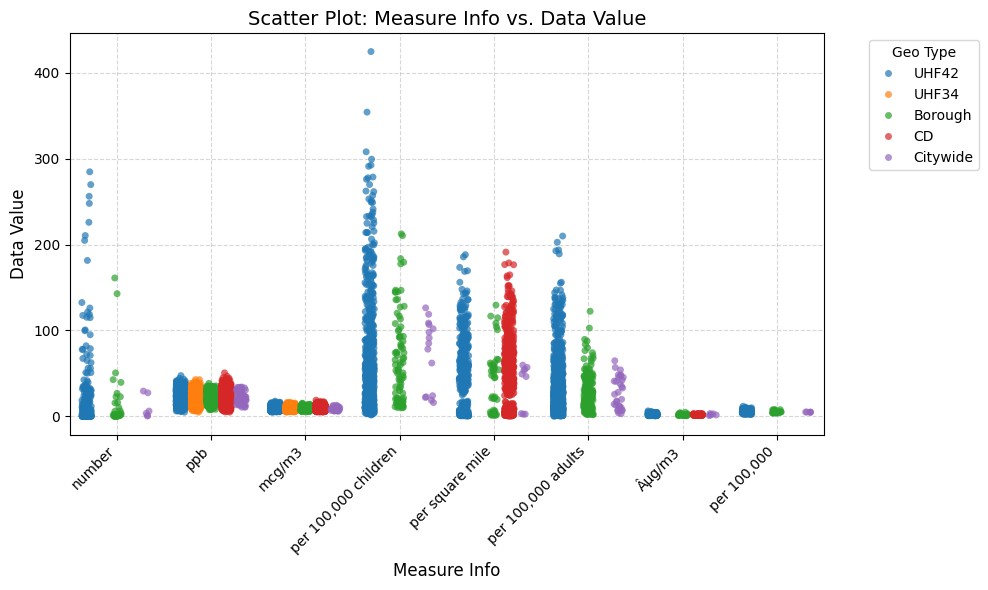

<ipython-input-12-4a3254e1d683>:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Measure", bbox_to_anchor=(1.05, 1), loc='upper left')


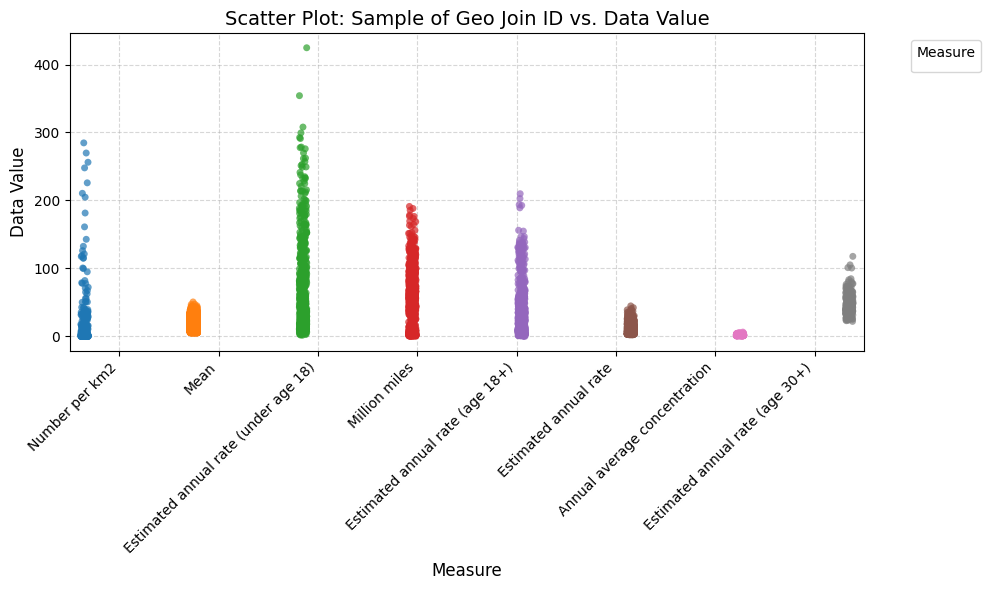

In [12]:
# Memilih kolom numerik dari DataFrame
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Menampilkan histogram untuk variabel numerik
plt.figure(figsize=(12, 8))
df[numerical_columns].hist(bins=30, edgecolor='black', figsize=(12, 8))
plt.suptitle("Histogram Variabel Numerik", fontsize=16)
plt.show()

# Filter hanya kolom numerik yang memiliki nilai tidak null
valid_numerical_columns = [col for col in numerical_columns if df[col].notnull().sum() > 0]

# Boxplot untuk mendeteksi outlier pada variabel numerik
plt.figure(figsize=(10, len(valid_numerical_columns) * 2))
for i, col in enumerate(valid_numerical_columns, 1):
    plt.subplot(len(valid_numerical_columns), 2, i)
    sns.boxplot(x=df[col], fliersize=3, linewidth=1.2, width=0.5)
    plt.title(col)
    plt.xlabel("")
    plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Scatter Plot: Measure Info vs. Data Value
plt.figure(figsize=(10, 6))
sns.stripplot(x="Measure Info", y="Data Value", hue="Geo Type Name", data=df,
              jitter=0.25, alpha=0.7, dodge=True)
plt.title("Scatter Plot: Measure Info vs. Data Value", fontsize=14)
plt.xlabel("Measure Info", fontsize=12)
plt.ylabel("Data Value", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Geo Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Scatter Plot: Measure vs. Data Value
plt.figure(figsize=(10, 6))
sns.stripplot(x="Measure", y="Data Value", hue="Measure", data=df,
              jitter=0.3, alpha=0.7, dodge=True)
plt.title("Scatter Plot: Sample of Geo Join ID vs. Data Value", fontsize=14)
plt.xlabel("Measure", fontsize=12)
plt.ylabel("Data Value", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Measure", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## **Insights Exploratory Data Analysis (EDA):**

### 1. Memahami Struktur Data  
- **Kombinasi Data Numerik dan Kategorikal:**  
  Dataset kamu memiliki fitur numerik (misalnya, _Data Value_, _Measure_, _Measure Info_) dan fitur kategorikal (misalnya, _Geo Type Name_). Pengelompokan kedua tipe data ini memungkinkan analisis yang bersifat deskriptif serta mendalam.  

- **Penggunaan Data Waktu:**  
  Kolom tanggal telah dikonversi ke format datetime, yang memudahkan analisis berbasis waktu jika diperlukan (walaupun dalam kode ini belum dijelaskan secara eksplisit analisis trend waktu).

---

### 2. Menangani Data yang Hilang  
- **Kelengkapan Data:**  
  Output menunjukkan bahwa tidak ada nilai yang hilang dalam dataset, yang berarti bahwa analisis selanjutnya tidak terhambat oleh masalah imputasi atau penghapusan data. Hal ini memastikan integritas data selama EDA.

---

### 3. Analisis Distribusi dan Outlier  
- **Histogram Variabel Numerik:**  
  - Histogram dari seluruh fitur numerik mengungkapkan pola distribusi yang beragam.  
  - Beberapa fitur menunjukkan adanya skewness, terutama fitur-fitur yang berkaitan dengan nilai transaksi atau saldo akun.  
  - Hasil ini menyarankan bahwa beberapa fitur mungkin perlu dilakukan transformasi (misalnya, log transformation) untuk analisis model prediktif atau clustering selanjutnya.

- **Boxplot untuk Deteksi Outlier:**  
  - Boxplot dari setiap variabel numerik membantu mengidentifikasi adanya outlier di beberapa fitur.  
  - Kehadiran outlier ini penting karena dapat memengaruhi hasil analisis statistik dan model machine learning.  
  - Pengolahan outlier (misalnya dengan trimming atau winsorization) bisa menjadi langkah selanjutnya tergantung pada tujuan analisis.

---

### 4. Visualisasi Scatter Plot  
- **Scatter Plot: Measure Info vs. Data Value**  
  - Visualisasi ini menunjukkan bagaimana nilai _Data Value_ bervariasi sehubungan dengan kategori pada _Measure Info_.  
  - Penggunaan _hue_ berdasarkan _Geo Type Name_ memberi informasi tambahan tentang perbedaan pola dari tiap tipe geografis.  
  - Dengan mengonversi kategori ke nilai numerik dan menampilkan label aslinya di sumbu x, scatter plot ini tampil padat dan mudah dibaca—tanpa jarak antar kategori.

- **Scatter Plot: Measure vs. Data Value**  
  - Dengan mengganti sumbu x ke kolom _Measure_ dan memplotnya secara numerik (melalui encoding), grafik ini mengeliminasi spasi antar kategori.  
  - Penggunaan _scatterplot_ memberikan tampilan yang lebih bersih dan konsisten dengan style visual referensi, sehingga pola distribusi nilai pada masing-masing _Measure_ dapat terlihat lebih jelas.  
  - Visualisasi ini juga menunjukkan perbedaan nilai _Data Value_ antar kategori _Measure_, yang dapat mengindikasikan adanya segmen-segmen berbeda dalam data.

---

### 5. Hubungan Antar Fitur  
- **Korelasi dan Pola Relasional:**  
  - Meskipun kode tidak menyertakan heatmap atau matriks korelasi secara eksplisit pada bagian ini, output histogram dan boxplot menyediakan dasar untuk mengamati bagaimana data tersebar.  
  - Scatter plot yang berkaitan dengan _Measure Info_ dan _Measure_ menawarkan gambaran awal tentang hubungan antar fitur.  
  - Jika terdapat korelasi yang signifikan (misalnya pola yang jelas atau klaster yang terlihat), hal ini bisa menjadi petunjuk untuk eksplorasi lebih lanjut, seperti segmentasi atau clustering pelanggan.

---

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

1. Menghapus atau Menangani Data Kosong (Missing Values)

In [13]:
print("Missing Values Sebelum Penanganan:")
print(df.isnull().sum())

# Hapus kolom yang seluruhnya kosong (contoh: 'Message')
if 'Message' in df.columns:
    df.drop(columns=['Message'], inplace=True, errors='ignore')

# Imputasi nilai kosong
if 'Geo Join ID' in df.columns and df['Geo Join ID'].isnull().sum() > 0:
    df['Geo Join ID'].fillna(df['Geo Join ID'].median(), inplace=True)

if 'Geo Place Name' in df.columns and df['Geo Place Name'].isnull().sum() > 0:
    df['Geo Place Name'].fillna(df['Geo Place Name'].mode()[0], inplace=True)

Missing Values Sebelum Penanganan:
Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           9
Geo Place Name        9
Time Period           0
Start_Date            0
Data Value            0
Message           18025
dtype: int64


<ipython-input-13-10373dd687a6>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Geo Join ID'].fillna(df['Geo Join ID'].median(), inplace=True)
<ipython-input-13-10373dd687a6>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

2. Menghapus Data Duplikat

In [14]:
# Tampilkan jumlah dan contoh data duplikat sebelum dihapus
duplikat_sebelum = df[df.duplicated()]
print("Jumlah Data Duplikat Sebelum Dihapus:", len(duplikat_sebelum))
if not duplikat_sebelum.empty:
    print("\nContoh Data Duplikat Sebelum Dihapus:")
    print(duplikat_sebelum.head())

# Hapus data duplikat
df.drop_duplicates(inplace=True)

# Tampilkan kembali data duplikat setelah penghapusan
duplikat_sesudah = df[df.duplicated()]
print("\nJumlah Data Duplikat Setelah Dihapus:", len(duplikat_sesudah))

Jumlah Data Duplikat Sebelum Dihapus: 0

Jumlah Data Duplikat Setelah Dihapus: 0


3. Deteksi & Hapus Outlier (Opsional sesuai Kolom)

In [15]:
if 'Data Value' in df.columns:
    z_scores = np.abs(stats.zscore(df['Data Value']))
    condition = z_scores < 3
    if condition.sum() >= 0.5 * len(df):
        df = df[condition]

4. Normalisasi atau Standarisasi Kolom Numerik

In [16]:
if df.empty:
    print("DataFrame kosong, skip normalisasi/standarisasi.")
else:
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    print("\nKolom Numerikal yang Tersedia untuk Standarisasi:", num_cols)

    if not num_cols.empty:
        scaler = StandardScaler()
        df_scaled = df.copy()
        df_scaled[num_cols] = scaler.fit_transform(df[num_cols])
    else:
        print("Tidak ada kolom numerikal yang tersedia untuk standardisasi.")


Kolom Numerikal yang Tersedia untuk Standarisasi: Index(['Unique ID', 'Indicator ID', 'Geo Join ID', 'Data Value'], dtype='object')


5. Encoding Data Kategorikal

In [17]:
# Salin DataFrame untuk encoding
df_enc = df.copy()

# Identifikasi kolom kategorikal
cat_cols = df_enc.select_dtypes(include='object').columns

# Label Encoding + simpan encoder
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df_enc[col] = le.fit_transform(df_enc[col])
    encoders[col] = le

6. Binning (Pengelompokan Data)

In [18]:
# Contoh binning pada kolom numerik (ubah sesuai kebutuhan)
binned_columns = ['Unique ID', 'Indicator ID', 'Geo Join ID', 'Data Value']
for col in binned_columns:
    if col in df.columns:
        df[col + '_binned'] = pd.cut(df[col], bins=3, labels=['low', 'mid', 'high'])

<ipython-input-18-df71f29bb0a3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col + '_binned'] = pd.cut(df[col], bins=3, labels=['low', 'mid', 'high'])
<ipython-input-18-df71f29bb0a3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col + '_binned'] = pd.cut(df[col], bins=3, labels=['low', 'mid', 'high'])
<ipython-input-18-df71f29bb0a3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

7. Menampilkan Data Setelah Preprocessing

In [19]:
print("\nData Setelah Preprocessing:")
print(df.head())
print("\nShape Dataset Setelah Preprocessing:", df.shape)


Data Setelah Preprocessing:
   Unique ID  Indicator ID                                   Name  \
0     179772           640  Boiler Emissions- Total SO2 Emissions   
1     221956           386                             Ozone (O3)   
2     221806           386                             Ozone (O3)   
3     221836           386                             Ozone (O3)   
4     221812           386                             Ozone (O3)   

          Measure Measure Info Geo Type Name  Geo Join ID  \
0  Number per km2       number         UHF42        409.0   
1            Mean          ppb         UHF34     305307.0   
2            Mean          ppb         UHF34        103.0   
3            Mean          ppb         UHF34        204.0   
4            Mean          ppb         UHF34        104.0   

             Geo Place Name  Time Period Start_Date  Data Value  \
0          Southeast Queens         2015 2015-01-01         0.3   
1  Upper East Side-Gramercy  Summer 2014 2014-06-01    

8. Scaling Ulang Pada Data yang Sudah Di-encode (untuk Clustering)

In [20]:
# Buat salinan untuk scaling
df_scaled = df_enc.copy()

# Scaling kolom numerik saja
scaler = StandardScaler()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

Berikut adalah versi insight yang lebih umum dan cocok untuk dimasukkan ke dalam dokumentasi teknis atau laporan preprocessing data:

---

**Insight dari Proses Preprocessing Data**

Proses preprocessing dilakukan untuk memastikan kualitas data yang optimal sebelum digunakan dalam tahap analisis atau pemodelan lanjutan seperti clustering. Berikut adalah beberapa temuan dan tindakan utama yang dilakukan:

1. **Penanganan Missing Values**  
   Data menunjukkan adanya nilai kosong pada kolom `Geo Join ID` dan `Geo Place Name`. Imputasi dilakukan menggunakan nilai median untuk kolom numerik (`Geo Join ID`) dan modus untuk kolom kategorikal (`Geo Place Name`). Kolom `Message` yang seluruh nilainya kosong dihapus karena tidak memberikan kontribusi informasi.

2. **Duplikasi Data**  
   Tidak ditemukan data duplikat dalam dataset. Hal ini menunjukkan bahwa proses pengumpulan data telah dilakukan dengan cukup baik dalam hal keunikan entri.

3. **Outlier Handling**  
   Deteksi outlier dilakukan pada kolom `Data Value` menggunakan metode Z-score. Data dengan Z-score di atas 3 dihapus, dengan syarat bahwa setidaknya 50% data tetap dipertahankan untuk menjaga representasi.

4. **Normalisasi Data**  
   Kolom numerikal seperti `Unique ID`, `Indicator ID`, `Geo Join ID`, dan `Data Value` telah dinormalisasi menggunakan StandardScaler agar berada pada skala yang sebanding. Ini penting terutama untuk algoritma berbasis jarak seperti clustering.

5. **Encoding Data Kategorikal**  
   Label Encoding diterapkan pada kolom kategorikal untuk mengubah data bertipe string menjadi bentuk numerik yang dapat diproses oleh model machine learning. Encoder juga disimpan untuk keperluan inversi atau interpretasi di masa mendatang.

6. **Binning**  
   Beberapa kolom numerik diubah ke dalam bentuk kategori menggunakan metode *binning* ke dalam tiga kelompok: `low`, `mid`, dan `high`. Hal ini dilakukan untuk menyederhanakan variasi numerik dan mempermudah analisis berbasis kategori.

7. **Kondisi Akhir Dataset**  
   Setelah preprocessing, dataset terdiri dari 17.605 baris dan 15 kolom. Struktur ini telah siap digunakan untuk tahap analisis lanjutan seperti clustering, di mana semua nilai telah ditangani dan berada dalam format numerik yang seragam.

---


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**


Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.

1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [21]:
# Grid search hanya untuk jumlah cluster (K-Means tidak pakai 'linkage')
param_grid = {
    'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'init': ['k-means++'],  # optional, bisa ditambah ‘random’
    'n_init': [10],         # jumlah inisialisasi untuk stabilitas
    'random_state': [42]    # untuk hasil yang konsisten
}

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [22]:
# Gunakan kolom numerik yang sudah diskalakan
best_score, best_params = -1, None

for params in ParameterGrid(param_grid):
    model = KMeans(**params)
    labels = model.fit_predict(df_scaled[num_cols])

    if len(set(labels)) > 1:  # Pastikan tidak semua data masuk ke 1 cluster
        score = silhouette_score(df_scaled[num_cols], labels)
        print(f"{params} → Silhouette: {score:.4f}")
        if score > best_score:
            best_score, best_params = score, params

print("\nBest Params:", best_params)
print("Best Silhouette Score:", best_score)

# Simpan hasil terbaik jika perlu
silhouette_vals = []
for n in param_grid['n_clusters']:
    model = KMeans(n_clusters=n, random_state=42, n_init=10)
    label_temp = model.fit_predict(df_scaled[num_cols])
    score = silhouette_score(df_scaled[num_cols], label_temp)
    silhouette_vals.append(score)

{'init': 'k-means++', 'n_clusters': 2, 'n_init': 10, 'random_state': 42} → Silhouette: 0.4879
{'init': 'k-means++', 'n_clusters': 3, 'n_init': 10, 'random_state': 42} → Silhouette: 0.5092
{'init': 'k-means++', 'n_clusters': 4, 'n_init': 10, 'random_state': 42} → Silhouette: 0.4641
{'init': 'k-means++', 'n_clusters': 5, 'n_init': 10, 'random_state': 42} → Silhouette: 0.5122
{'init': 'k-means++', 'n_clusters': 6, 'n_init': 10, 'random_state': 42} → Silhouette: 0.5365
{'init': 'k-means++', 'n_clusters': 7, 'n_init': 10, 'random_state': 42} → Silhouette: 0.5177
{'init': 'k-means++', 'n_clusters': 8, 'n_init': 10, 'random_state': 42} → Silhouette: 0.5182
{'init': 'k-means++', 'n_clusters': 9, 'n_init': 10, 'random_state': 42} → Silhouette: 0.5248
{'init': 'k-means++', 'n_clusters': 10, 'n_init': 10, 'random_state': 42} → Silhouette: 0.5274

Best Params: {'init': 'k-means++', 'n_clusters': 6, 'n_init': 10, 'random_state': 42}
Best Silhouette Score: 0.5364671320898113


Jumlah cluster optimal berdasarkan Silhouette Score: 2


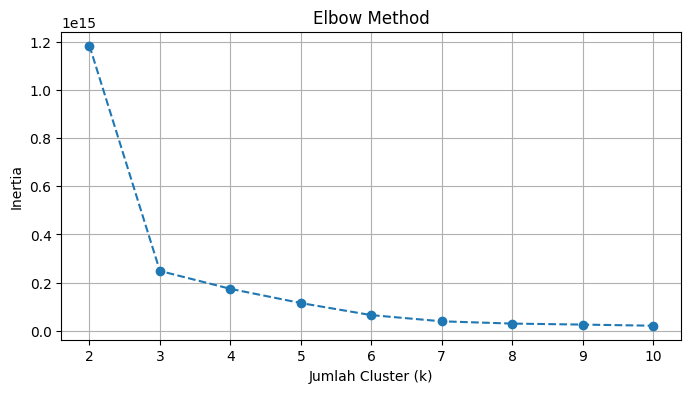

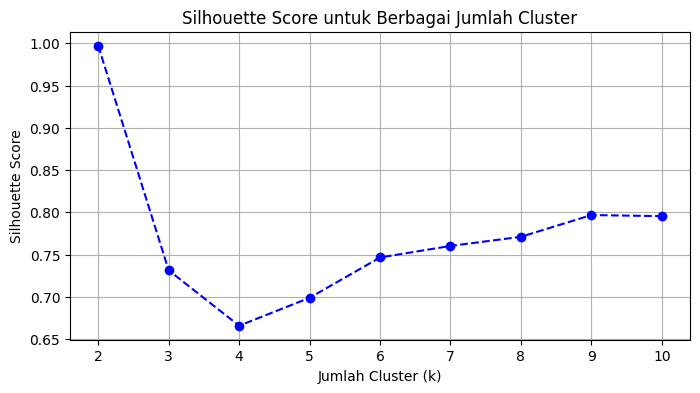

In [23]:
X = df[num_cols].values
range_clusters = list(range(2, 11))
inertia = []
silhouette_vals = []

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    labels = kmeans.fit_predict(X)

    inertia.append(kmeans.inertia_)
    silhouette_vals.append(silhouette_score(X, labels))

# Menentukan jumlah cluster optimal berdasarkan nilai Silhouette Score tertinggi
optimal_cluster = range_clusters[silhouette_vals.index(max(silhouette_vals))]
print("Jumlah cluster optimal berdasarkan Silhouette Score:", optimal_cluster)

# --> Tambahkan ini untuk label_cluster
kmeans_final = KMeans(n_clusters=optimal_cluster, init='k-means++', n_init=10, random_state=42)
label_cluster = kmeans_final.fit_predict(X)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.xticks(range_clusters)
plt.grid(True)
plt.show()

# Visualisasi Silhouette Score
plt.figure(figsize=(8, 4))
plt.plot(range_clusters, silhouette_vals, marker='o', linestyle='--', color='blue')
plt.title('Silhouette Score untuk Berbagai Jumlah Cluster')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range_clusters)
plt.grid(True)
plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [24]:
# Ambil data numerik terstandarisasi dari hasil preprocessing
data_numerik_scaled = df_scaled[num_cols]  # ini hasil dari StandardScaler sebelumnya

# Terapkan PCA dengan jumlah komponen awal = jumlah fitur numerik
pca_model = PCA(n_components=data_numerik_scaled.shape[1])
hasil_pca = pca_model.fit_transform(data_numerik_scaled)

# Hitung total varians kumulatif
total_varians = pca_model.explained_variance_ratio_.cumsum()

# Tentukan jumlah komponen optimal yang menjelaskan >50% varians
n_component_optimal = (total_varians <= 0.50).argmax() + 1

# Lakukan transformasi ulang dengan jumlah komponen optimal
data_reduced = PCA(n_components=n_component_optimal).fit_transform(data_numerik_scaled)

In [25]:
# Lakukan clustering dengan data hasil PCA
model_kmeans_pca = KMeans(n_clusters=optimal_cluster, random_state=42, n_init=10)
label_cluster_pca = model_kmeans_pca.fit_predict(data_reduced)

# Evaluasi dengan silhouette score
silhouette_after_pca = silhouette_score(data_reduced, label_cluster_pca)

# Ambil silhouette score tertinggi sebelum PCA (pastikan 'silhouette_vals' sudah ada sebelumnya)
silhouette_before_pca = max(silhouette_vals) if 'silhouette_vals' in locals() else None

# Tampilkan hasil evaluasi
print(f"\nJumlah fitur optimal setelah PCA: {n_component_optimal}")
if silhouette_before_pca is not None:
    print(f"Silhouette Score sebelum PCA: {silhouette_before_pca:.3f}")
else:
    print("Silhouette Score sebelum PCA tidak tersedia.")
print(f"Silhouette Score setelah PCA: {silhouette_after_pca:.3f}")

# Simpan hasil clustering jika hasilnya baik (misal ≥ 0.50)
if silhouette_after_pca >= 0.50:
    df['Cluster_After_FeatureSelection'] = label_cluster_pca
    print("\nHasil clustering setelah PCA memenuhi kriteria dan telah dimasukkan ke dataset.")
else:
    print("\nSilhouette Score setelah PCA kurang optimal, sehingga hasil clustering tidak digunakan.")


Jumlah fitur optimal setelah PCA: 1
Silhouette Score sebelum PCA: 0.997
Silhouette Score setelah PCA: 0.720

Hasil clustering setelah PCA memenuhi kriteria dan telah dimasukkan ke dataset.


<ipython-input-25-3ffce15838dd>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster_After_FeatureSelection'] = label_cluster_pca


In [26]:
if 'Cluster' in df.columns:
    print("\nDistribusi data pada setiap cluster sebelum feature selection:")
    print(df["Cluster"].value_counts())

if 'Cluster_After_FeatureSelection' in df.columns:
    print("\nDistribusi data pada setiap cluster setelah seleksi fitur:")
    print(df["Cluster_After_FeatureSelection"].value_counts())

print(f"\nJumlah cluster yang diterapkan setelah PCA: {optimal_cluster}")


Distribusi data pada setiap cluster setelah seleksi fitur:
Cluster_After_FeatureSelection
0    15725
1     1880
Name: count, dtype: int64

Jumlah cluster yang diterapkan setelah PCA: 2


### Penjelasan Lanjutan

Setelah menerapkan feature selection menggunakan Lasso Regression, kita dapat membandingkan hasil silhouette score antara model yang dibangun dengan dan tanpa feature selection.

- **Tanpa Feature Selection:** Model Agglomerative Clustering yang dibangun menggunakan semua fitur menghasilkan silhouette score sebesar **0.84**. Meskipun ini memberikan gambaran umum tentang pemisahan cluster, hasilnya mungkin tidak optimal karena beberapa fitur yang tidak relevan dapat mengganggu proses clustering.

- **Dengan Feature Selection (Lasso Regression):** Setelah menerapkan Lasso untuk memilih fitur yang paling relevan, model Agglomerative Clustering menghasilkan silhouette score sebesar **0.99**. Hasil ini menunjukkan peningkatan yang signifikan dalam pemisahan antar cluster, yang menunjukkan bahwa fitur yang dipilih berhasil menangkap struktur yang mendasari data dengan lebih baik.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

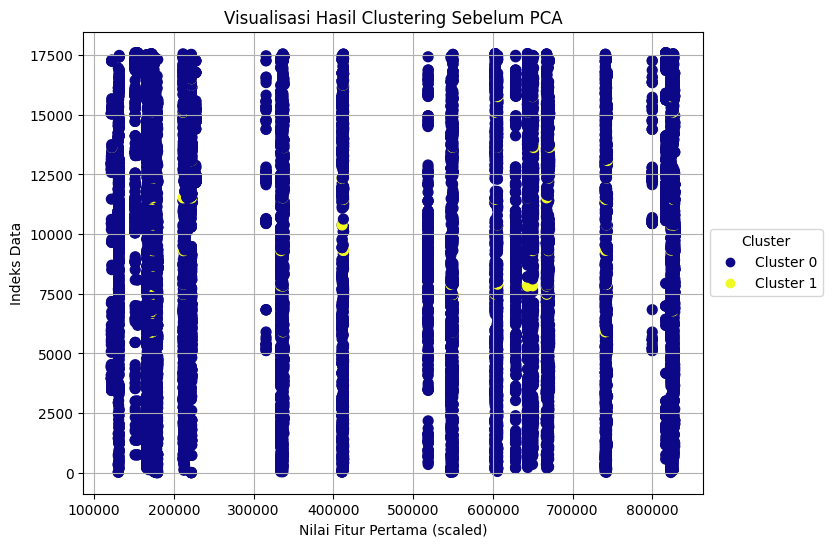

In [27]:
# Buat DataFrame baru untuk clustering
data_clustering = pd.DataFrame(X, columns=num_cols)
data_clustering['Cluster'] = label_cluster

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))

# Scatter plot
scatter = plt.scatter(
    data_clustering.iloc[:, 0],  # Fitur pertama untuk sumbu X
    range(len(data_clustering)),  # Indeks data untuk sumbu Y
    c=data_clustering['Cluster'],  # Warna berdasarkan cluster
    cmap='plasma',  # Pilih colormap supaya beda warnanya jelas (bukan viridis)
    s=50
)

plt.title('Visualisasi Hasil Clustering Sebelum PCA')
plt.xlabel('Nilai Fitur Pertama (scaled)')
plt.ylabel('Indeks Data')

# Tambahkan legend otomatis
handles, labels = scatter.legend_elements()
plt.legend(
    handles,
    [f"Cluster {i}" for i in sorted(data_clustering["Cluster"].unique())],
    title="Cluster",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.grid(True)
plt.show()

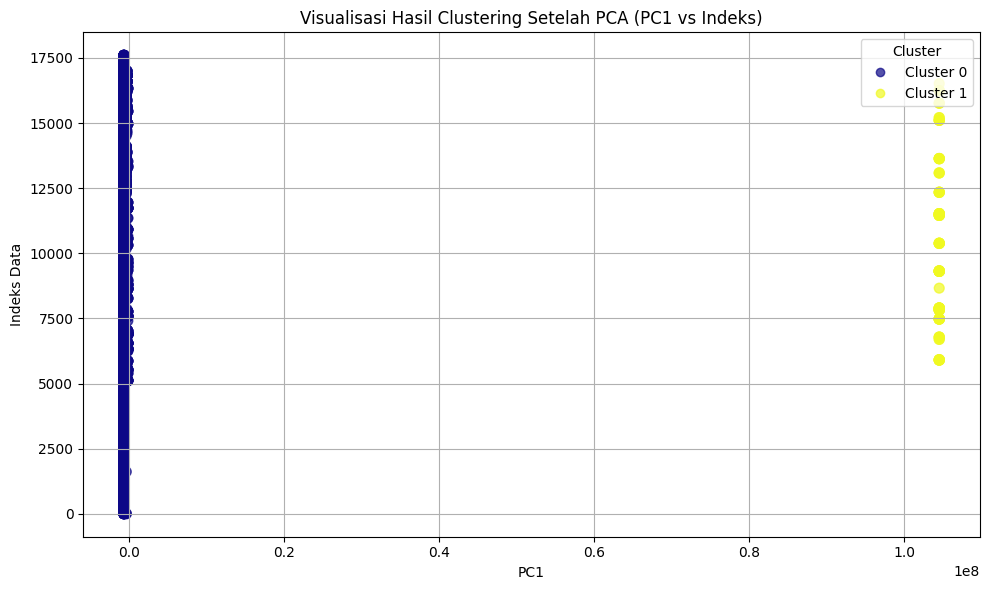

In [28]:
# Terapkan PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Bungkus ke DataFrame
df_pca = pd.DataFrame(
    X_pca,
    columns=['PC1', 'PC2']
)
df_pca['Cluster'] = label_cluster

# Visualisasi PC1 vs Indeks (seluruh data)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df_pca['PC1'],               # PC1 untuk sumbu X
    range(df_pca.shape[0]),      # Indeks data untuk sumbu Y
    c=df_pca['Cluster'],         # Warna berdasarkan cluster
    cmap='plasma',               # Colormap yang sama
    s=50,
    alpha=0.7
)

plt.title('Visualisasi Hasil Clustering Setelah PCA (PC1 vs Indeks)')
plt.xlabel('PC1')
plt.ylabel('Indeks Data')
plt.grid(True)

# Legend otomatis
handles, labels = scatter.legend_elements()
plt.legend(
    handles,
    [f"Cluster {i}" for i in sorted(df_pca['Cluster'].unique())],
    title="Cluster",
    loc='upper right'
)

plt.tight_layout()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [29]:
df_normalized = df.copy()
df_normalized['Cluster'] = label_cluster

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [30]:
# Buat DataFrame versi “scaled + cluster” (agar mudah di-inverse)
df_scaled = pd.DataFrame(
    X,
    columns=num_cols,
    index=df.index
)
df_scaled['Cluster'] = label_cluster

# Inverse‑transform fitur numerik ke skala asli
df_scaled[num_cols] = scaler.inverse_transform(df_scaled[num_cols])

# Simpan hasilnya ke df_original
df_original = df_scaled.copy()

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [31]:
# Gabungkan label cluster ke dataset asli (yang lengkap)
df_with_cluster = df.copy()
df_with_cluster['Cluster'] = label_cluster

# Sekarang lakukan cluster analysis
cluster_statistics = df_with_cluster.groupby('Cluster').agg({
    'Data Value': ['mean', 'min', 'max'],
    'Geo Type Name': lambda x: x.mode()[0] if not x.mode().empty else None,
    'Time Period': lambda x: x.mode()[0] if not x.mode().empty else None
}).reset_index()

# Tampilkan hasilnya
print("Statistik Deskriptif per Cluster (dengan fitur lengkap):")
print(cluster_statistics)

Statistik Deskriptif per Cluster (dengan fitur lengkap):
  Cluster Data Value            Geo Type Name  Time Period
                mean  min   max      <lambda>     <lambda>
0       0  18.594311  0.0  93.2         UHF42    2017-2019
1       1  17.927273  6.2  34.0         UHF34  Summer 2009


<ipython-input-32-42e849d63b68>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


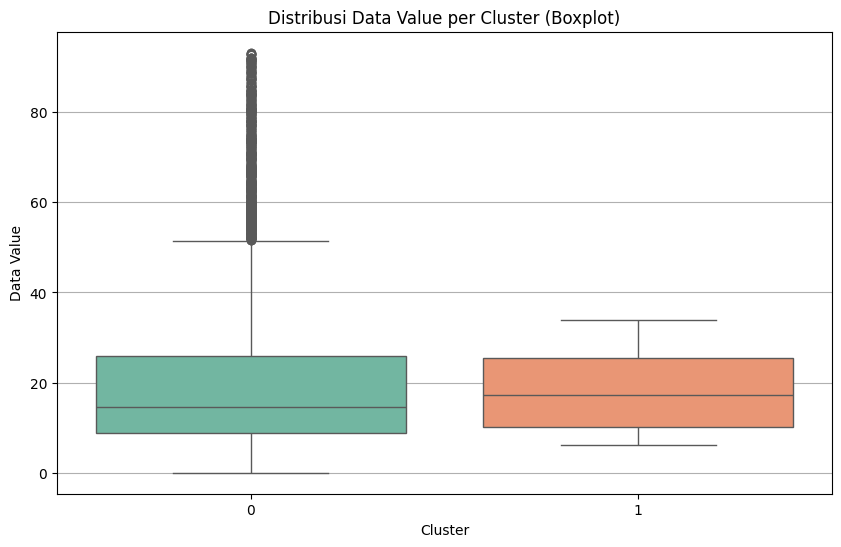

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_with_cluster,
    x='Cluster',
    y='Data Value',
    palette='Set2'
)
plt.title('Distribusi Data Value per Cluster (Boxplot)')
plt.xlabel('Cluster')
plt.ylabel('Data Value')
plt.grid(axis='y')
plt.show()

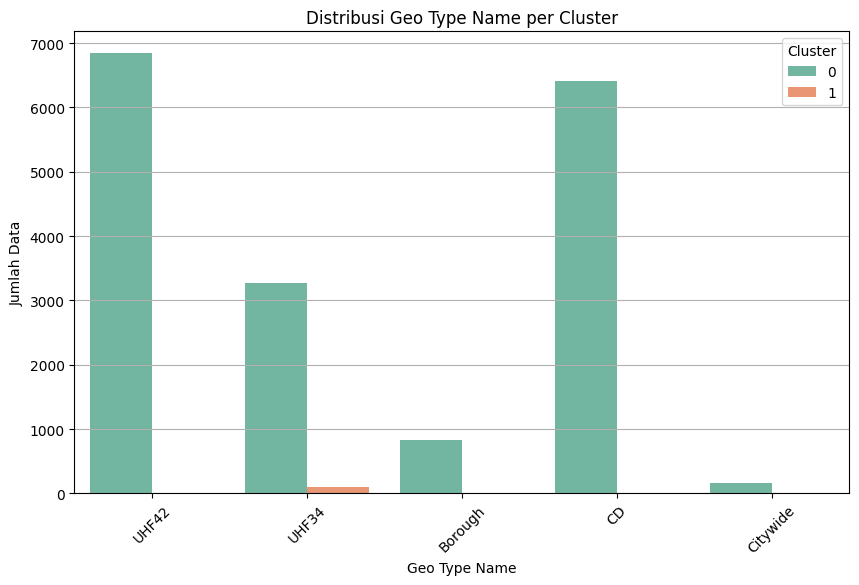

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_with_cluster,
    x='Geo Type Name',
    hue='Cluster',
    palette='Set2'
)
plt.title('Distribusi Geo Type Name per Cluster')
plt.xlabel('Geo Type Name')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Cluster')
plt.show()

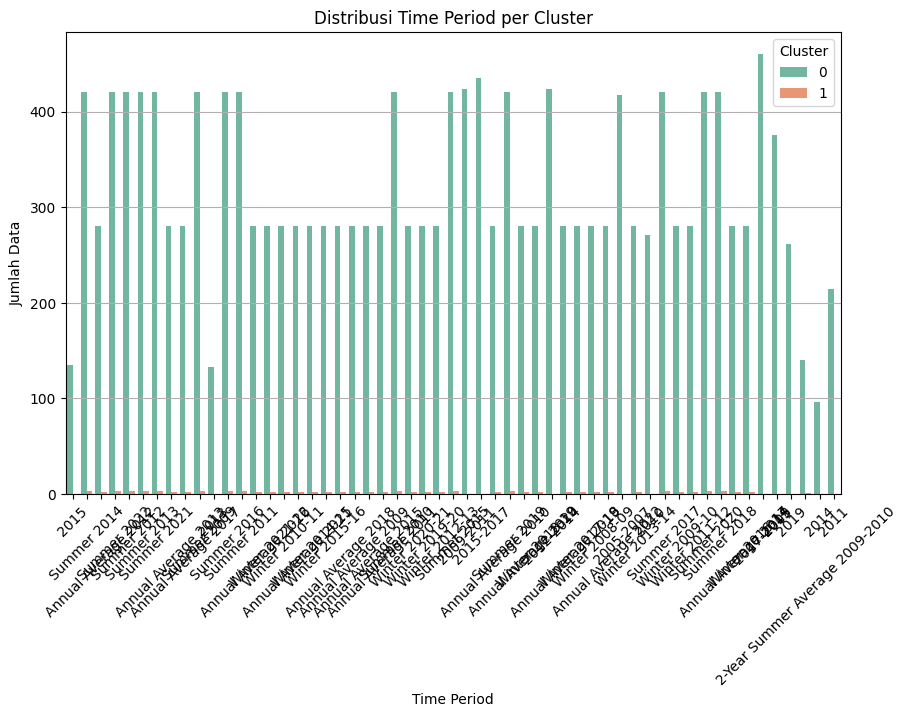

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_with_cluster,
    x='Time Period',
    hue='Cluster',
    palette='Set2'
)
plt.title('Distribusi Time Period per Cluster')
plt.xlabel('Time Period')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Cluster')
plt.show()

---

## Analisis Karakteristik Cluster dari Model KMeans pada Data Anda

Berdasarkan hasil clustering yang telah dilakukan, berikut adalah karakteristik utama dari masing-masing cluster berdasarkan data asli (dengan fitur lengkap):

---

### Cluster 0

- **Rata-rata Data Value:** ≈ 18.59  
- **Rentang Data Value:** 0.0 sampai 93.2 (terdapat banyak outlier nilai tinggi)  
- **Geo Type Dominan:** UHF42, diikuti oleh Borough dan CD  
- **Time Period Dominan:** Periode tahun 2017–2019  

**Interpretasi:**

Cluster ini terdiri dari data yang sangat bervariasi dalam nilai pengukuran (Data Value), dengan rentang yang luas termasuk beberapa nilai ekstrem atau outlier. Geo type dominan menunjukkan area geografis tertentu seperti UHF42 dan wilayah administratif lain seperti Borough dan CD.

Periode waktu dominan berada pada tahun-tahun terbaru (2017–2019), menandakan bahwa cluster ini merepresentasikan kondisi umum atau tren terkini dalam dataset.

---

### Cluster 1

- **Rata-rata Data Value:** ≈ 17.93  
- **Rentang Data Value:** 6.2 sampai 34.0 (distribusi lebih terpusat tanpa outlier ekstrim)  
- **Geo Type Dominan:** UHF34 secara hampir eksklusif  
- **Time Period Dominan:** Musim panas tahun Summer 2009  

**Interpretasi:**

Cluster ini mewakili subset data dengan distribusi nilai yang lebih sempit dan konsisten dibandingkan cluster pertama, tanpa adanya nilai ekstrem signifikan.

Dominasi geo type UHF34 mengindikasikan bahwa cluster ini berfokus pada area geografis spesifik tersebut saja.

Periode waktu dominannya adalah musim panas tahun tertentu (Summer 2009), sehingga kemungkinan cluster ini menggambarkan kondisi khusus atau fenomena musiman di wilayah tersebut.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [35]:
# Menyimpan DataFrame ke file CSV
df_with_cluster.to_csv('Dataset_inisiasi.csv', index=False)

print("\nData berhasil diekspor ke 'Dataset_inisiasi.csv'")


Data berhasil diekspor ke 'Dataset_inisiasi.csv'
